# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify. 

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms

## Downloading data

HRP only requires historical returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.2'

In [2]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  15 of 15 completed


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2023-04-24,165.330002,87.570000,29.760000,674.190002,73.440002,99.680000,442.320007,34.680000,374.730011,270.420013,3.67,163.940002,134.839996,54.549999,152.759995
2023-04-25,163.770004,83.800003,28.840000,659.710022,72.870003,98.010002,419.829987,33.700001,368.529999,262.410004,3.56,157.610001,133.509995,54.700001,151.570007
2023-04-26,163.759995,85.940002,28.440001,650.669983,72.260002,96.610001,413.700012,34.230000,366.760010,269.559998,3.41,155.449997,134.020004,54.389999,150.910004
2023-04-27,168.410004,87.440002,28.889999,662.679993,73.059998,99.930000,429.160004,34.750000,373.670013,272.260010,3.60,158.149994,137.520004,55.490002,151.380005
2023-04-28,169.679993,89.370003,29.280001,671.200012,73.309998,102.500000,443.950012,35.720001,380.029999,277.489990,3.51,157.750000,137.330002,55.529999,150.970001


In [3]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2023-04-24,0.001879,-0.009725,-0.003683,-0.009913,0.008237,0.001105,-0.009140,-0.026663,-0.001359,-0.002839,-0.013441,0.010852,0.001262,0.000734,0.006788
2023-04-25,-0.009436,-0.043051,-0.030914,-0.021478,-0.007761,-0.016754,-0.050846,-0.028258,-0.016545,-0.029621,-0.029973,-0.038612,-0.009864,0.002750,-0.007790
2023-04-26,-0.000061,0.025537,-0.013870,-0.013703,-0.008371,-0.014284,-0.014601,0.015727,-0.004803,0.027247,-0.042135,-0.013705,0.003820,-0.005667,-0.004354
2023-04-27,0.028395,0.017454,0.015823,0.018458,0.011071,0.034365,0.037370,0.015191,0.018841,0.010016,0.055718,0.017369,0.026116,0.020224,0.003114
2023-04-28,0.007541,0.022072,0.013500,0.012857,0.003422,0.025718,0.034463,0.027914,0.017020,0.019210,-0.025000,-0.002529,-0.001382,0.000721,-0.002708


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [4]:
from pypfopt import HRPOpt

In [5]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03501),
             ('AMD', 0.0175),
             ('BAC', 0.0461),
             ('BLK', 0.04916),
             ('CVS', 0.09592),
             ('DIS', 0.06697),
             ('INTU', 0.03229),
             ('JD', 0.04161),
             ('MA', 0.05053),
             ('NVDA', 0.01689),
             ('PBI', 0.08005),
             ('TGT', 0.08748),
             ('TM', 0.11489),
             ('UL', 0.15641),
             ('WMT', 0.1092)])

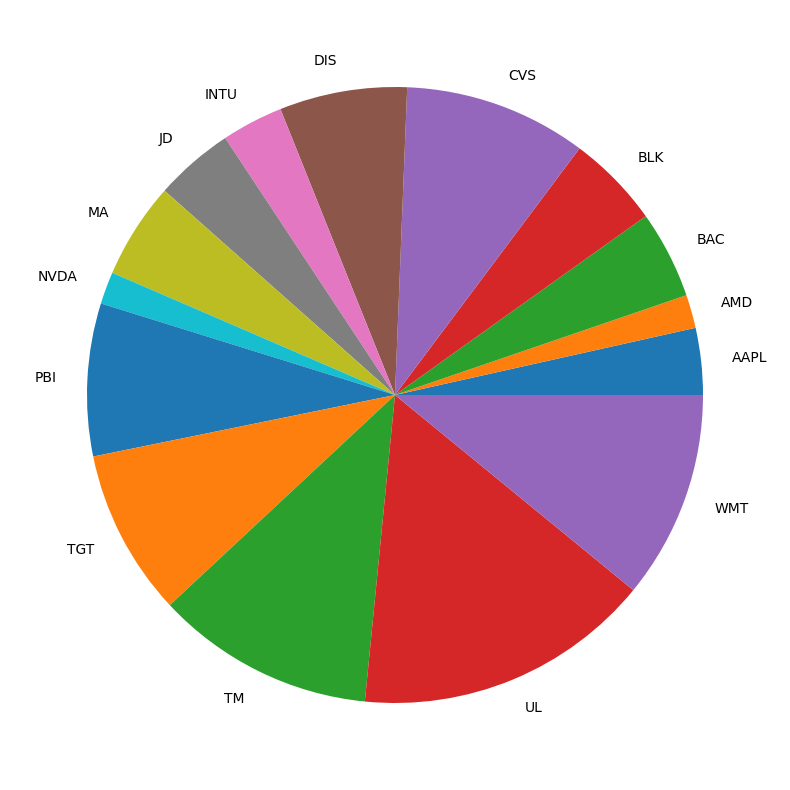

In [6]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [7]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 18.6%
Annual volatility: 19.1%
Sharpe Ratio: 0.87


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

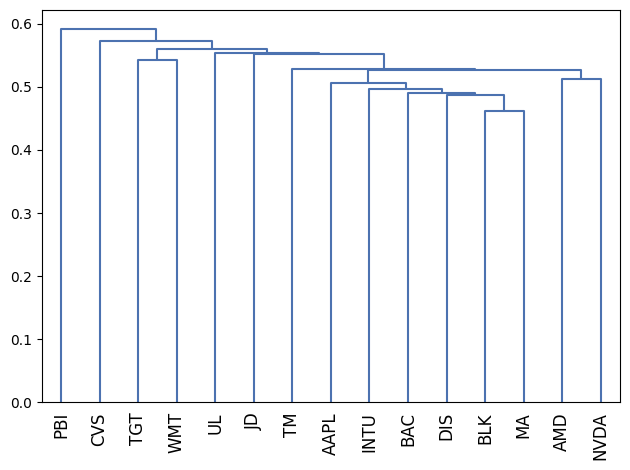

In [8]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.